In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/Users/dmitrybertnikov/Desktop/ds_learn/product_sales/raw/2019-Oct.csv')
df.head().T

,0,1,2,3,4
event_time,2019-10-01 00:00:00 UTC,2019-10-01 00:00:03 UTC,2019-10-01 00:00:07 UTC,2019-10-01 00:00:07 UTC,2019-10-01 00:00:15 UTC
event_type,cart,cart,cart,cart,cart
product_id,5773203,5773353,5881589,5723490,5881449
category_id,1487580005134238553,1487580005134238553,2151191071051219817,1487580005134238553,1487580013522845895
category_code,NaN,NaN,NaN,NaN,NaN
brand,runail,runail,lovely,runail,lovely
price,2.62,2.62,13.48,2.62,0.56
user_id,463240011,463240011,429681830,463240011,429681830
user_session,26dd6e6e-4dac-4778-8d2c-92e149dab885,26dd6e6e-4dac-4778-8d2c-92e149dab885,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,26dd6e6e-4dac-4778-8d2c-92e149dab885,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4102283 entries, 0 to 4102282
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 281.7+ MB


In [7]:
print(df.isnull().sum())
df['category_code'].fillna('unknown', inplace=True)
df['brand'].fillna('unknown', inplace=True)
df.dropna(subset=['user_session'], inplace=True)

df['event_time'] = pd.to_datetime(df['event_time'])

# df.columns = df.columns.str.strip()
# df['event_type'] = df['event_time'].str.strip()
# df['category_code'] = df['category_code'].str.strip()
# df['brand'] = df['brand'].str.strip()
df.info()
df.head()


event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64


/var/folders/r4/7c89w02s21378007ly_nbnkw0000gn/T/ipykernel_6407/3157462469.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['category_code'].fillna('unknown', inplace=True)
/var/folders/r4/7c89w02s21378007ly_nbnkw0000gn/T/ipykernel_6407/3157462469.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

<class 'pandas.core.frame.DataFrame'>
Index: 4101646 entries, 0 to 4102282
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 312.9+ MB


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,unknown,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,unknown,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,unknown,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,unknown,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,unknown,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


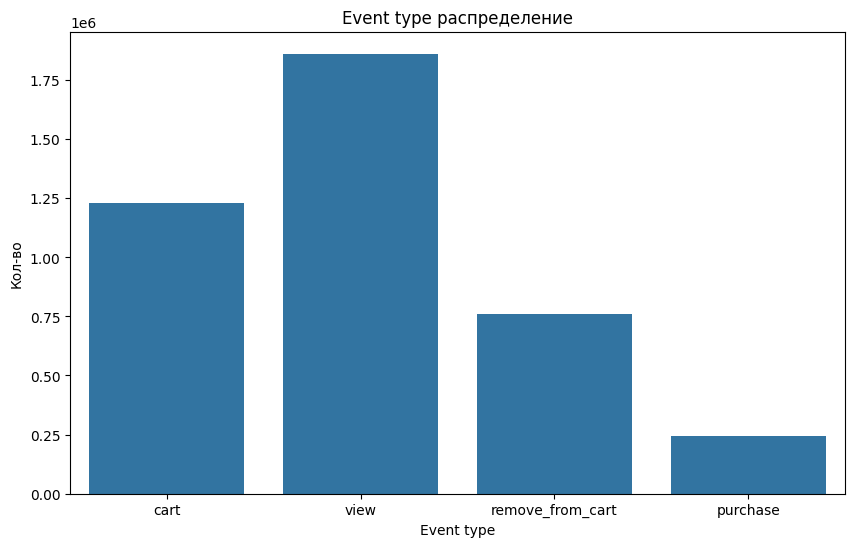

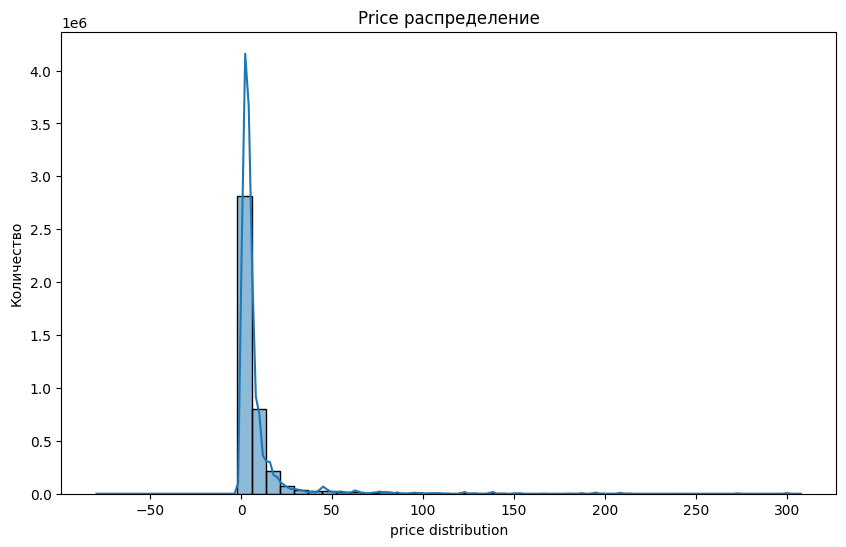

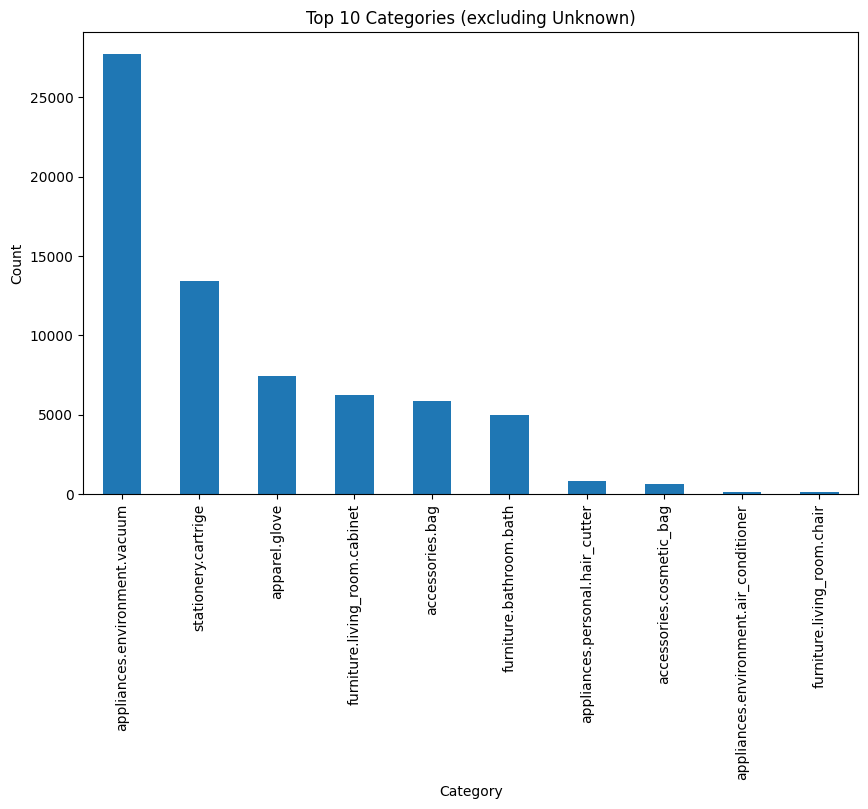

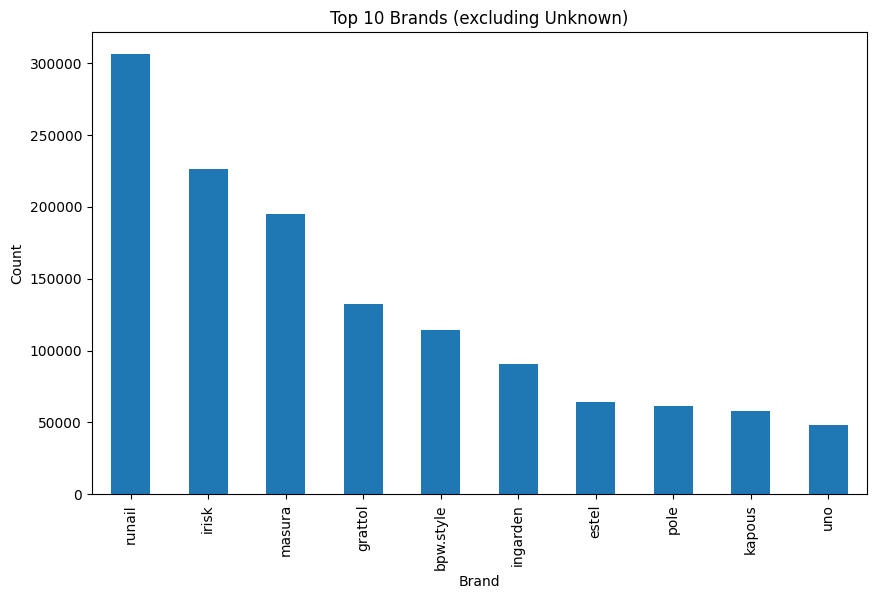

In [8]:
# event
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='event_type')
plt.title('Event type распределение')
plt.xlabel('Event type')
plt.ylabel('Кол-во')
plt.show()

#price

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='price', bins=50, kde=True)
plt.title('Price распределение')
plt.xlabel('price distribution')
plt.ylabel('Количество')
plt.show()

# category
plt.figure(figsize=(10,6))
df_filtr = df[df['category_code'] != 'unknown']
df_filtr['category_code'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Categories (excluding Unknown)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# brand
plt.figure(figsize=(10,6))
df_filtr = df[df['brand'] != 'unknown']
df_filtr['brand'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Brands (excluding Unknown)')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()